# notebooks/exploration.ipynb

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from dotenv import load_dotenv
import os
from stock_predictor.data_loader import fetch_alpha_vantage
from stock_predictor.training_pipeline import split_data, scale_data, prepare_sequences
from stock_predictor.model_building import build_and_train_model, predict_and_inverse


2025-05-12 09:02:54.789534: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-12 09:02:54.792617: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 09:02:54.805876: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 09:02:54.819804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747033374.839030   55257 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747033374.84

In [ ]:
######################################################
### API-Zugriff mit Umgebungsvariablen über dotenv  ##
######################################################

# Beschreibung:
# Dieses Skript lädt eine API-Schlüssel-Variable aus einer .env-Datei
# mithilfe der dotenv-Bibliothek und gibt den Wert in der Konsole aus.

from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("ALPHAVANTAGE_API_KEY_1")

print(api_key)

9M2NC2CCUWDC2JRZ


In [ ]:
#########################################################
### Datenabruf von Alpha Vantage mit eigener Funktion ###
#########################################################

# Beschreibung:
# Dieses Skript verwendet eine benutzerdefinierte Funktion aus dem Modul `stock_predictor.data_loader`,
# um historische Börsendaten eines bestimmten Symbols (z. B. IBM) mit einem API-Schlüssel von Alpha Vantage abzurufen.
# Anschließend werden die letzten Zeilen der Daten ausgegeben.

from stock_predictor.data_loader import fetch_alpha_vantage

symbol = "IBM"

df_stock = fetch_alpha_vantage(symbol, api_key)

# Ergebnisse Anzeigen
df_stock.tail()


,open,high,low,close,volume
2025-05-05,243.74,249.80,243.640,249.18,4138168.0
2025-05-06,247.76,250.19,246.110,249.12,2900556.0
2025-05-07,249.45,254.47,248.832,253.37,3400001.0
2025-05-08,255.00,256.52,253.250,254.14,3637012.0
2025-05-09,252.51,253.00,247.640,249.20,2901346.0


In [ ]:
##############################################################
### Aufteilen der Börsendaten in Trainings- und Testdaten  ###
##############################################################

from stock_predictor.training_pipeline import split_data

# Daten in Trainingdaten und Testdaten aufteilen
train_df, test_df = split_data(df_stock, train_ratio=0.8)


In [ ]:
################################################
### Skalierung der Trainings- und Testdaten  ###
################################################

import joblib
from stock_predictor.training_pipeline import scale_data

train_scaled, test_scaled, scaler = scale_data(train_df, test_df)

#scaler = joblib.load("models/scaler_ibm.pkl")


In [ ]:
#################################################
### Erstellen von Sequenzen für LSTM-Modelle  ###
#################################################

from stock_predictor.training_pipeline import prepare_sequences
# 3. Sequenzen erstellen (für LSTM)
X_train, y_train, X_test, y_test = prepare_sequences(train_scaled, test_scaled, target_col_index=3, n_steps=60)

In [ ]:
#############################################
### LSTM-Modell erstellen und trainieren  ###
#############################################

from stock_predictor.model_building import build_and_train_model

# 4. Model bauen und Training
model = build_and_train_model(X_train, y_train)

W0000 00:00:1747033380.803918   55257 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - val_loss: 0.0011
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.4844e-04 - val_loss: 7.7787e-04
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9338e-04 - val_loss: 6.9498e-04
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.1881e-04 - val_loss: 6.0766e-04
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.6888e-04 - val_loss: 5.4241e-04
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.6391e-04 - val_loss: 5.0303e-04
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.3598e-04 - val_loss: 4.6934e-04
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.1078e-04 - val_loss: 4.1432e-04
Epoch 9/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7743e-04 - val_loss: 3.8364e-04
Epoch 10/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.8075e-04 - val_loss: 3.7092e-04


In [ ]:
###########################################
### Modell speichern nach dem Training  ###
###########################################

symbol = "IBM"
model.save(f"../models/lstm_{symbol.lower()}.keras")


In [ ]:
###############################################################
### Vorhersagen erstellen und Rückskalieren der Ergebnisse  ###
###############################################################

from stock_predictor.model_building import predict_and_inverse


pred_rescaled, true_rescaled = predict_and_inverse(model, X_test, y_test, scaler, train_scaled.shape[1], target_col_index=3)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


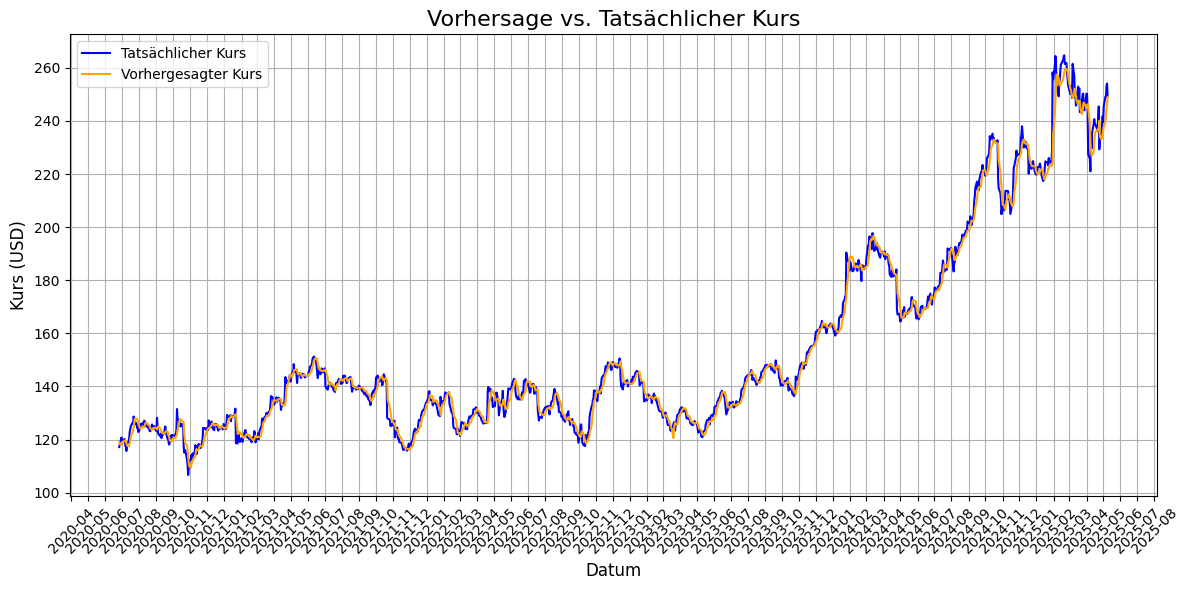

In [ ]:
######################################################
### Visualisierung der Vorhersagen mit Matplotlib  ###
######################################################

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 6. Visualisierung (Streamlit / Matplotlib)

# Angenommen: du hast
# - pred_rescaled (Vorhersage)
# - true_rescaled (Tatsächlicher close-Preis)
# - test_df.index (Datumsindex vom Original-DataFrame)

fig, ax = plt.subplots(figsize=(12, 6))

# X-Achse sind die Zeitstempel aus dem Test-DataFrame
dates = test_df.index[-len(pred_rescaled):]

ax.plot(dates, true_rescaled, label='Tatsächlicher Kurs', color='blue')
ax.plot(dates, pred_rescaled, label='Vorhergesagter Kurs', color='orange')

# X-Achse mit Monat & Jahr
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Achsentitel & Formatierung
ax.set_title('Vorhersage vs. Tatsächlicher Kurs', fontsize=16)
ax.set_xlabel('Datum', fontsize=12)
ax.set_ylabel('Kurs (USD)', fontsize=12)
ax.grid(True)
ax.legend()

# Auto-Rotation für Datum
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Vergleich basiert auf den zurückskalierten Werten (echte vs. predicted)
rmse = np.sqrt(mean_squared_error(true_rescaled, pred_rescaled))
mae = mean_absolute_error(true_rescaled, pred_rescaled)
r2 = r2_score(true_rescaled, pred_rescaled)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 3.42
MAE: 2.32
R² Score: 0.99


/tmp/ipykernel_55257/3599368792.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sa_linux/.pyenv/versions/3.10.6/envs/stock_predictor_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


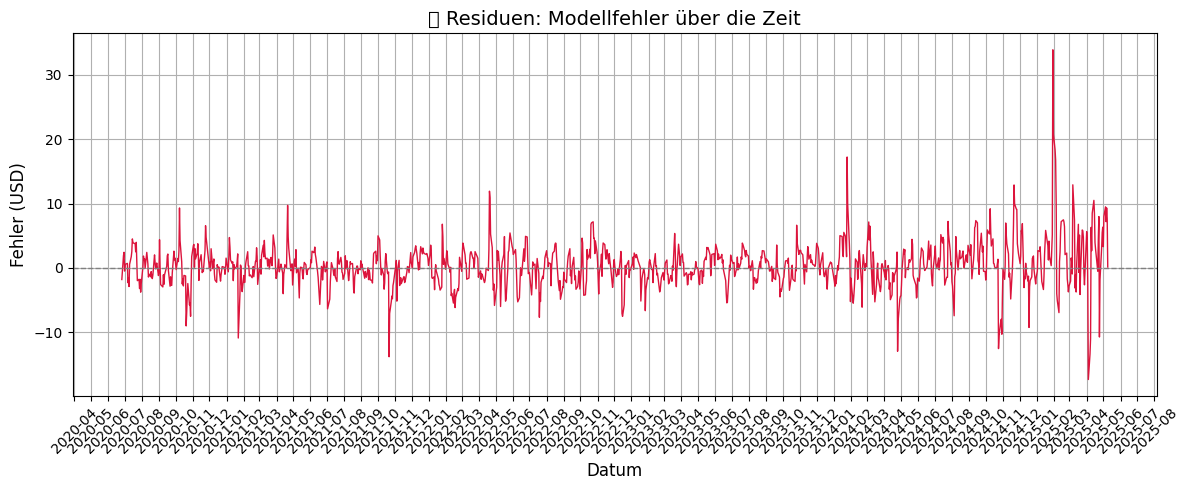

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# residuals = true_rescaled - pred_rescaled
# Annahme: test_df.index ist der Zeitindex der echten Daten
residuals = true_rescaled - pred_rescaled
residual_dates = test_df.index[-len(residuals):]

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(residual_dates, residuals, color='crimson', linewidth=1)
ax.axhline(0, linestyle='--', color='gray', linewidth=1)

# X-Achse: Monate mit Jahr anzeigen
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Beschriftungen & Format
ax.set_title("📉 Residuen: Modellfehler über die Zeit", fontsize=14)
ax.set_xlabel("Datum", fontsize=12)
ax.set_ylabel("Fehler (USD)", fontsize=12)
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
